Data Visualization
- in this lab, we will cover data visualization techniques using famous library known as matplot.
- Data Visualization is essential steps when you want to communicate your findings with yoyr stakeholders or any other interested partues.
- Apart from matplotlib, there are several other data visualization tools available. However learning matplotlib will make your path easier in learning other visualizations tools as well.
MAtplotlib is a widely used python library for creating static, interactive, and animated visualizations. It provides a flexible and easy-to-use interface for generating various plots, charts, and graphs.
- Plotting in pandas:-
    - Pandas also has a built-in implementation via plot() method.
    - so plotting in pandas is easy.



In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
datapath = "HR_comma_sep (1).csv"


In [4]:
df_hr = pd.read_csv(datapath)
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Questions that will be answered by data are? 

1. `How does the average satisfaction level change with increasing years of employment?`
2. `How many employees have spent a specific number of years (time spent in the company)?`
3. `What is the distribution of satisfaction levels among employees?`
4. `What is the distribution of work accidents among departments?`
5. `What is the distribution of promotions based on departments?`
6. `How does employee satisfaction vary across different departments?`
7. `Figure out employee leaving status (time_spend vs satisfaction_level vs left?`
8. `How are the numerical variables correlated with each other?`
9. `How to create different scatter plots under single matplotlib figure?`

In [33]:
# Qno 1: How does the average satisfaction level change with increasing years of employment?
import pandas as pd
df = pd.read_csv(datapath)
grouped_data = df.groupby('time_spend_company')
avg_satisfaction_level = grouped_data['satisfaction_level'].mean()


print(avg_satisfaction_level)

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64


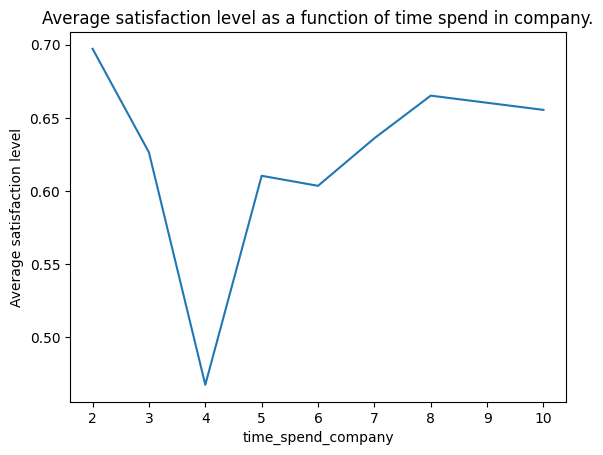

In [34]:
# Qno 1:-
avg_satisfaction_level.plot(kind='line')
plt.title('Average satisfaction level as a function of time spend in company.')
plt.xlabel('time_spend_company')
plt.ylabel('Average satisfaction level')

plt.show()

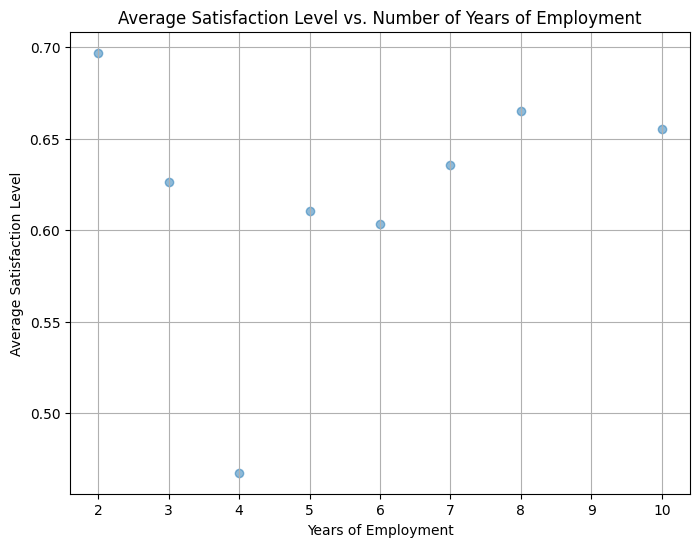

In [22]:
# How does the average satisfaction level change with increasing years of employment?[Scatter plot]
sat_by_year =df.groupby('time_spend_company')['satisfaction_level'].mean()


sat_plot_data = pd.DataFrame({
    'years_of_employment': sat_by_year.index,
    'average_satisfaction_level': sat_by_year.values
})

satisfaction_level = sat_by_year.reset_index(drop=True)
plt.figure(figsize=(8, 6))
plt.scatter(sat_plot_data['years_of_employment'],sat_plot_data['average_satisfaction_level'], alpha=0.5)

plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level vs. Number of Years of Employment')
plt.grid(True)

plt.show()

- We can see that the satisfaction level of employees are gradually decreasing for the past 4 years of their joining.
- After 4 years, we can see that the satisfaction level is gradually increasing.


In [9]:
# Qno 2: How many employees have spent a specific number of years (time spent in the company)?
df = pd.read_csv(datapath)
grouped_data = df.groupby('time_spend_company')
num_employees = grouped_data.size()
print(num_employees)

time_spend_company
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
dtype: int64


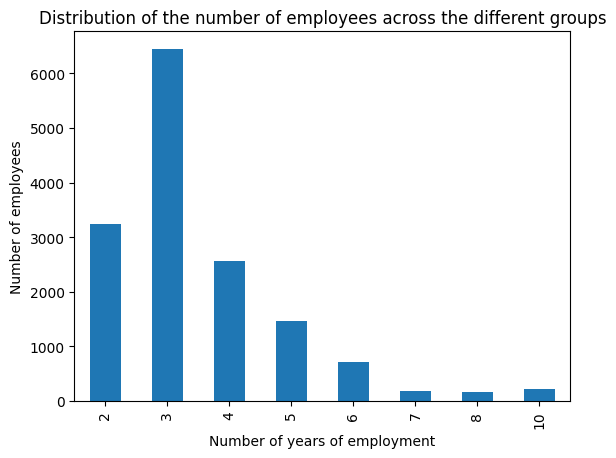

In [35]:
# Qno 2:-
num_employees.plot(kind='bar')
plt.title('Distribution of the number of employees across the different groups')
plt.xlabel('Number of years of employment')
plt.ylabel('Number of employees')


plt.show()

- Most of the employees spent 3 years in company.
- Quite of them spent 2 or 4 years  there, but not all.
- There are very few who stay there for more than 4 years.

In [41]:
# Qno 3: What is the distribution of satisfaction levels among employees?` [Histogram]
df = pd.read_csv(datapath)
grouped_data = df.groupby('satisfaction_level')
avg_satisfaction_level = grouped_data.size()
print(avg_satisfaction_level)

satisfaction_level
0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
       ... 
0.96    203
0.97    176
0.98    183
0.99    172
1.00    111
Length: 92, dtype: int64


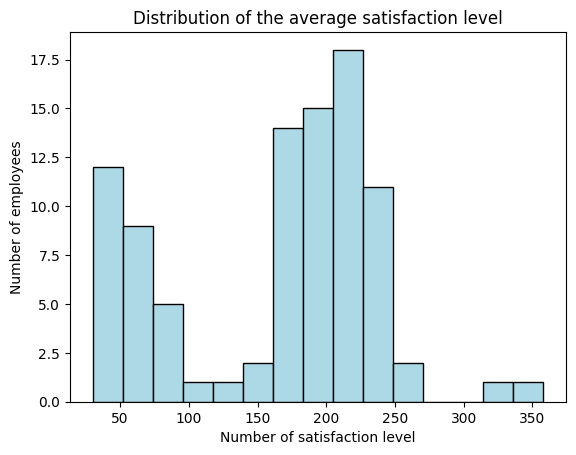

In [42]:
# Qno 3:-

plt.hist(avg_satisfaction_level, color='lightblue', ec='black', bins=15)
plt.title('Distribution of the average satisfaction level')
plt.xlabel('Number of satisfaction level')
plt.ylabel('Number of employees')


plt.show()

- this plot seems to be left-skewed.
- it means the mode is greater than median and median is greater than mean.


In [7]:
# Qno 4: What is the distribution of work accidents among departments?
df = pd.read_csv(datapath)
grouped_data = df.groupby('Department')
accident_lvl = grouped_data['Work_accident'].sum()
print(accident_lvl)

Department
IT             164
RandD          134
accounting      96
hr              89
management     103
marketing      138
product_mng    132
sales          587
support        345
technical      381
Name: Work_accident, dtype: int64


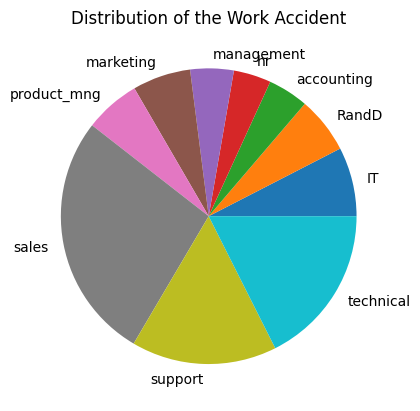

In [8]:
# Qno 4:-
accident_lvl.plot(kind='pie')
plt.title('Distribution of the Work Accident')
plt.xlabel('')
plt.ylabel('')

plt.show()


- It shows the accident that has occured in the each departments.
- we can see that the departments like sales, support, and technical seems to have more accidents than the rest.


In [9]:
# Qno 5: What is the distribution of promotions based on departments?
df = pd.read_csv(datapath)
grouped_data = df.groupby(['Department', 'promotion_last_5years'])
promo_dept = grouped_data['promotion_last_5years'].count().unstack()
print(promo_dept)

promotion_last_5years       0      1
Department                          
IT                     1224.0    3.0
RandD                   760.0   27.0
accounting              753.0   14.0
hr                      724.0   15.0
management              561.0   69.0
marketing               815.0   43.0
product_mng             902.0    NaN
sales                  4040.0  100.0
support                2209.0   20.0
technical              2692.0   28.0


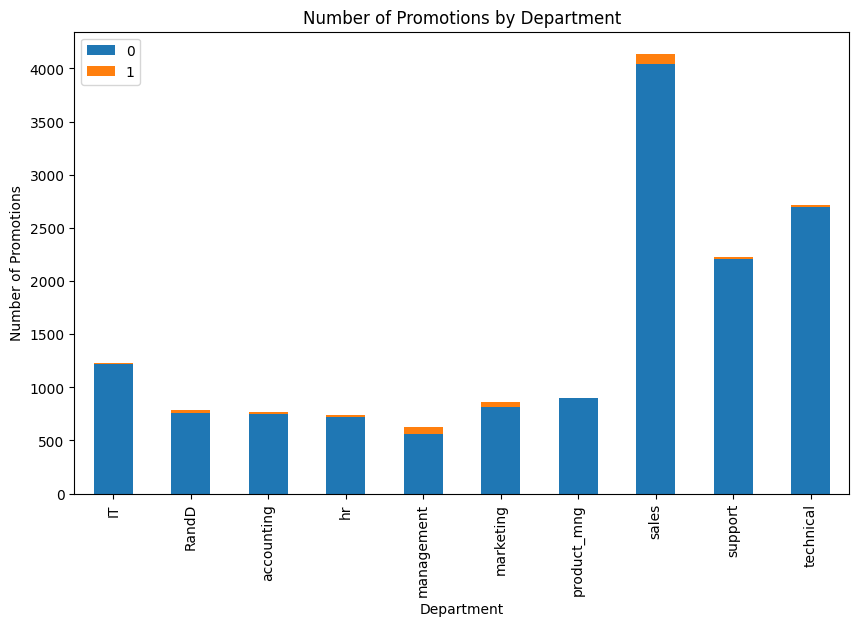

In [11]:
# Qno 5:-
promo_dept.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Number of Promotions by Department')
plt.xlabel('Department')
plt.ylabel('Number of Promotions')
plt.legend(loc='upper left')
plt.show()


- the plot shows the promotions throughout the each departments.
- we can see that the sales, technical, and support department has the most promotions.
- whereas management, hr, accounting seems to have less.

In [26]:
# Qno 6: How does employee satisfaction vary across different departments?` [Box Plot]
df = pd.read_csv(datapath)

grouped_data = [
    df[df['Department'] == depart] ['satisfaction_level']
    for  depart in set(df['Department'])
]

grouped_data
# grouped_data = df.groupby('Department')
# satisfaction_level = grouped_data['satisfaction_level'].unique()


# print(satisfaction_level)

[77       0.40
 83       0.84
 84       0.11
 85       0.11
 148      0.84
          ... 
 14876    0.10
 14944    0.83
 14950    0.39
 14951    0.39
 14952    0.44
 Name: satisfaction_level, Length: 858, dtype: float64,
 28       0.41
 29       0.38
 30       0.09
 79       0.39
 105      0.24
          ... 
 14898    0.10
 14946    0.10
 14972    0.11
 14973    0.36
 14974    0.36
 Name: satisfaction_level, Length: 767, dtype: float64,
 46       0.40
 47       0.57
 48       0.40
 49       0.43
 50       0.13
          ... 
 14994    0.40
 14995    0.37
 14996    0.37
 14997    0.11
 14998    0.37
 Name: satisfaction_level, Length: 2229, dtype: float64,
 301      0.12
 302      0.10
 303      0.37
 304      0.89
 305      0.45
          ... 
 14939    0.85
 14940    0.10
 14941    0.43
 14942    0.20
 14943    0.81
 Name: satisfaction_level, Length: 787, dtype: float64,
 0        0.38
 1        0.80
 2        0.11
 3        0.72
 4        0.37
          ... 
 14967    0.43
 14968    

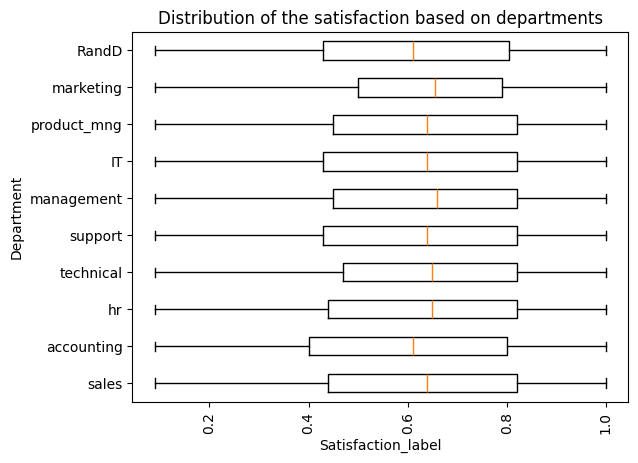

In [30]:
# Qno 6:-
# satisfaction_level.plot(kind='box')
plt.boxplot(grouped_data, labels=df['Department'].unique(), vert=False)
plt.title('Distribution of the satisfaction based on departments')
plt.xlabel('Satisfaction_label')
plt.ylabel('Department')
plt.xticks(rotation=90)
plt.show()



- From the plot we can say:
    - min and max satisfaction level among departments are quite similar in range.
    - Also, there are no any outliers, since no any data points are above lower fence and upper fence of Box plots.

In [5]:
# Qno 7: Figure out employee leaving status (time_spend vs satisfaction_level vs left?`[Bubble Plot]
import pandas as pd
df = pd.read_csv(datapath)
stats_by_time = df.groupby('time_spend_company').agg({'satisfaction_level': 'mean', 'left': 'sum'}).reset_index()
x_data = stats_by_time['time_spend_company']
y_data = stats_by_time['satisfaction_level']
z_data = stats_by_time['left']


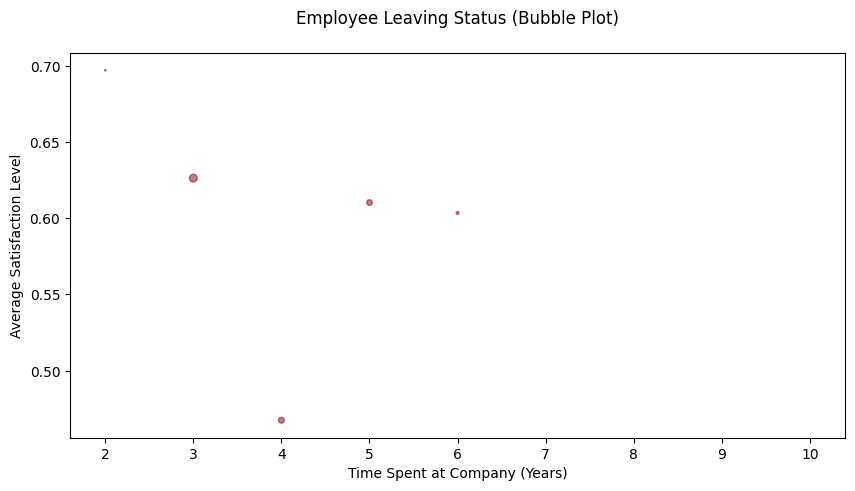

In [10]:
# Qno 7:-
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, s=z_data/50, alpha=0.5, c='darkred')
# for x, y, label in zip(x_data, y_data, z_data):
#     plt.annotate(str(label), xy=(x, y), xytext=(5, -10), textcoords='offset points',
#                  ha='right', va='bottom', fontsize=8, color='grey', weight='normal',
#                  backgroundcolor='white', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Average Satisfaction Level')
plt.xticks(rotation=0)
plt.title('Employee Leaving Status (Bubble Plot)\n')

plt.show()

- The above plot shows the employee leaving status.
- It compares the satisfaction level of employee and time spent  on job. 


In [31]:
# Qno 8: How are the numerical variables correlated with each other?`
df = pd.read_csv(datapath)
corr_matrix = df.corr(numeric_only=True)

print(corr_matrix)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

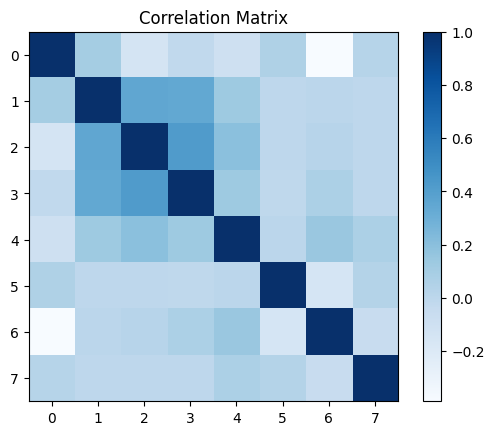

In [43]:
plt.imshow(corr_matrix, cmap='Blues')
plt.colorbar()
plt.title('Correlation Matrix') 
plt.show()


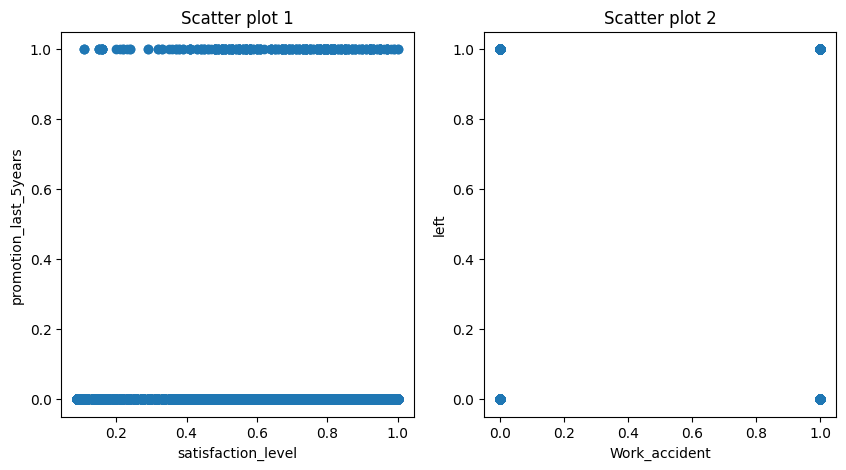

In [14]:
# Qno 9: How to create different scatter plots under single matplotlib figure?

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create a scatter plot on the first subplot
axs[0].scatter(x=df['satisfaction_level'], y=df['promotion_last_5years'])
axs[0].set_title('Scatter plot 1')
axs[0].set_xlabel('satisfaction_level')
axs[0].set_ylabel('promotion_last_5years')

# Create a scatter plot on the second subplot
axs[1].scatter(x=df['Work_accident'], y=df['left'])
axs[1].set_title('Scatter plot 2')
axs[1].set_xlabel('Work_accident')
axs[1].set_ylabel('left')

# Display the figure
plt.show()